In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.style.use('ggplot')
import missingno as msno
from imblearn.over_sampling import SMOTE

In [2]:
#Dataset import
data= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.train.csv')

In [3]:
data.head()

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             5634 non-null   object 
 1   customerID        5634 non-null   object 
 2   gender            5634 non-null   object 
 3   SeniorCitizen     5634 non-null   int64  
 4   Partner           5634 non-null   object 
 5   Dependents        5634 non-null   object 
 6   tenure            5634 non-null   int64  
 7   PhoneService      5634 non-null   object 
 8   MultipleLines     5634 non-null   object 
 9   InternetService   5634 non-null   object 
 10  OnlineSecurity    5634 non-null   object 
 11  OnlineBackup      5634 non-null   object 
 12  DeviceProtection  5634 non-null   object 
 13  TechSupport       5634 non-null   object 
 14  StreamingTV       5634 non-null   object 
 15  StreamingMovies   5634 non-null   object 
 16  Contract          5634 non-null   object 


In [5]:
#Label Encoding
le = preprocessing.LabelEncoder()
data_encoded = data.apply(le.fit_transform)
data_encoded

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,2370,0,0,0,1,21,1,0,0,...,0,2,0,0,2,1,0,3,586,492
1,0,3457,0,0,0,0,54,1,2,1,...,2,0,0,2,2,2,1,0,1170,3511
2,1,2149,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,2,59,1566
3,1,1426,1,0,0,0,4,1,0,1,...,0,0,0,0,0,0,1,2,674,1627
4,0,1545,1,0,0,1,0,1,2,0,...,2,0,2,0,0,2,1,0,546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,375,1,0,1,0,1,1,0,1,...,0,0,0,2,2,0,1,2,1129,5231
5630,0,3418,0,0,1,1,23,1,2,0,...,2,2,2,2,2,2,1,1,1060,1466
5631,0,4591,1,0,1,1,12,1,0,2,...,1,1,1,1,1,0,1,2,51,2167
5632,1,4247,1,1,0,0,12,1,2,1,...,0,2,0,2,2,0,1,2,1208,305


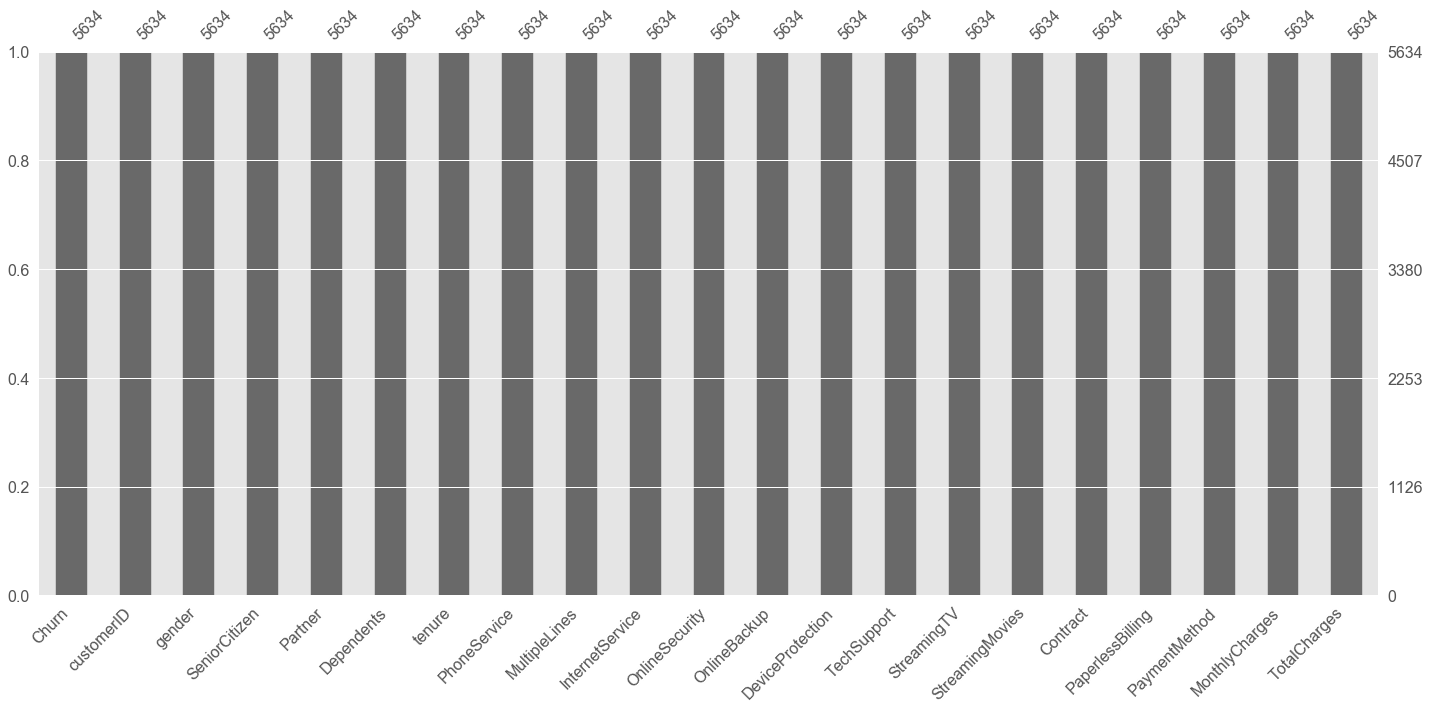

In [6]:
#Missing values bar chart
p=msno.bar(data)

0    4138
1    1496
Name: Churn, dtype: int64


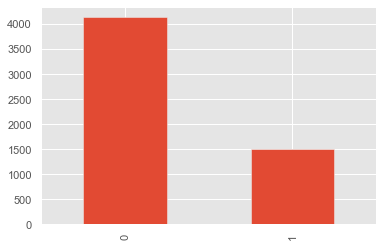

In [7]:
#Target values distribution
print(data_encoded.Churn.value_counts())
p=data_encoded.Churn.value_counts().plot(kind="bar")

In [8]:
#Scaling (Standardization)
sc= StandardScaler()
X = pd.DataFrame(sc.fit_transform(data_encoded.drop(["Churn"],axis = 1),
                               ),
                columns=[data_encoded.drop(["Churn"], axis =1).columns])

X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.274533,-1.025166,-0.437749,-0.969579,1.532186,-0.465683,0.329573,-1.000537,-1.182347,1.410879,-1.038357,1.248658,-0.921484,-1.117461,1.134234,0.372908,-1.200007,1.339267,-0.137217,-1.405444
1,0.393816,-1.025166,-0.437749,-0.969579,-0.652662,0.885537,0.329573,1.108339,0.174618,-0.915399,1.230004,-1.023609,-0.921484,1.140708,1.134234,1.577591,0.833328,-1.470949,1.146114,0.564101
2,-0.410417,0.975452,-0.437749,1.031376,-0.652662,-1.284605,-3.034225,0.053901,-1.182347,-0.915399,-1.038357,-1.023609,-0.921484,-1.117461,-1.123814,-0.831774,0.833328,0.402528,-1.295292,-0.704784
3,-0.854958,0.975452,-0.437749,-0.969579,-0.652662,-1.161766,0.329573,-1.000537,0.174618,-0.915399,-1.038357,-1.023609,-0.921484,-1.117461,-1.123814,-0.831774,0.833328,0.402528,0.056161,-0.664989
4,-0.781790,0.975452,-0.437749,-0.969579,1.532186,-1.325551,0.329573,1.108339,-1.182347,1.410879,1.230004,-1.023609,1.400358,-1.117461,-1.123814,1.577591,0.833328,-1.470949,-0.225117,-1.726416


In [9]:
#Target
y = data_encoded.Churn

The Stratify parameter splits the data so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify( i.e. if the y variable is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's).
 

In [10]:
#Train-Test Split
train_X,test_X,y_train,y_test = train_test_split(X,y,test_size=1/5,random_state=2, stratify=y)

I have chosen to oversample the data, given the fact that the "Yes" outcomes were considerably less than the "No" outcomes.
What my model's performance has lost in precision, it has gained in recall and f1-score. I made this choice due to the alarming amount of false negatives in my previous attempt's results ( and I also believe a better precision on positive outcomes is more important because of the context ). 


In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
train_X, y_train = sm.fit_sample(train_X, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1197
Before OverSampling, counts of label '0': 3310 

After OverSampling, counts of label '1': 3310
After OverSampling, counts of label '0': 3310


Models penalized with the L2 norm have many of their coefficients estimated as zero.
The goal is to reduce the dimensionality of the data which will then be passed on to another classifier and they can be used along with feature_selection.SelectFromModel to select the non-zero coefficients.

Advantages:

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

Improves Accuracy: Less misleading data means the accuracy of the model improves.

Reduces Training Time: Less data means that algorithms train faster.

In [12]:
#Feature Selection 
logistic = LogisticRegression(C = 10, penalty = "l2", max_iter = 1000).fit(train_X, y_train)
model = SelectFromModel(logistic, prefit = True)

selections = model.transform(train_X)
X_columns = pd.DataFrame(model.inverse_transform(selections),
                         
 columns = train_X.columns)

selected_columns = X_columns.columns[X_columns.var() != 0]

X_train = train_X[selected_columns]
X_test = test_X[selected_columns]

In [13]:
#Selected Features
selected_columns

MultiIndex([(          'tenure',),
            (    'PhoneService',),
            (  'OnlineSecurity',),
            (     'TechSupport',),
            (        'Contract',),
            ('PaperlessBilling',),
            (  'MonthlyCharges',)],
           )

In [14]:
#Model Training and # of neighbors selection
test_scores = []
train_scores = []

for i in range(1,50):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [15]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.41087613293051 % and k = [1]


In [16]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 77.10736468500443 % and k = [16]


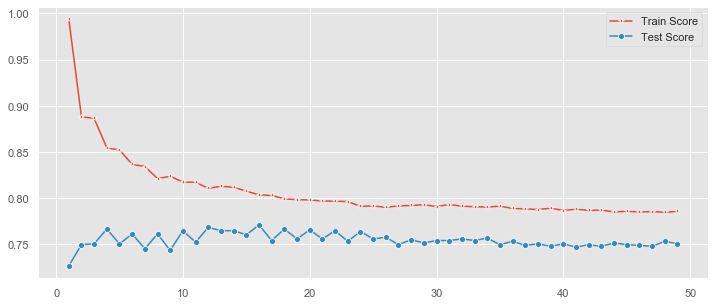

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,50),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,50),test_scores,marker='o',label='Test Score')

In [18]:
#Final Model and Accuracy
knn= KNeighborsClassifier(16)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7710736468500443

Text(0.5, 12.5, 'Predicted label')

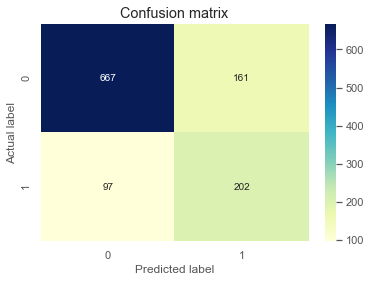

In [19]:
y_pred = knn.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       828
           1       0.56      0.68      0.61       299

    accuracy                           0.77      1127
   macro avg       0.71      0.74      0.72      1127
weighted avg       0.79      0.77      0.78      1127

